BACKGROUND:

Birdwatchers in Pennsylvania perceived a seemingly higher than usual number of Canada Warbler sightings this year, among other warbler species. It is difficult to say whether this perceived increase in sightings was indeed due to an actual increase in birds or some other factor, such as an increase in birdwatchers or an increase in overall birding trips due to COVID-19.
The goal of the experiment below was to determine whether there was an actual increase in Canada Warbler sightings in Pennsylvania or whether the perceived increase was due to more birdwatchers or more birding outings. The data file downloaded from eBird contained all sightings from April 2010 to June 2020 for all species, and was around 8GB, so some preliminary Excel transformations were used to create a few separate .csv files to pull in throughout the analyses.

In [1]:
import pandas as pd
from pandas import Series, DataFrame

Pull in data file containing data exclusively for canada warbler sightings from 2010-2020 and check out the structure.

In [2]:
data = pd.read_csv(r'C:\Users\mikea\Documents\Python Practice\eBird_Datasets\canada_warbler_PA_2010_2020.csv')
data.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Column1
0,URN:CornellLabOfOrnithology:EBIRD:OBS95281394,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,2,NaN,...,3.0,1,NaN,0,1,0,NaN,"Richard Nugent, Melissa Little and Shannon Tho...",NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS97523886,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,1,NaN,...,13.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS334717588,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,X,NaN,...,NaN,1,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS98304972,8/6/2018 23:58,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,1,NaN,...,6.0,1,G189385,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS91596613,8/6/2018 23:57,33028,species,Canada Warbler,Cardellina canadensis,NaN,NaN,11,NaN,...,1.0,1,NaN,0,1,0,NaN,"Heavy rain early, starting in mid-morning wind...",NaN,NaN


In [3]:
for col in data.columns:
    print (col)

GLOBAL UNIQUE IDENTIFIER
LAST EDITED DATE
TAXONOMIC ORDER
CATEGORY
COMMON NAME
SCIENTIFIC NAME
SUBSPECIES COMMON NAME
SUBSPECIES SCIENTIFIC NAME
OBSERVATION COUNT
BREEDING BIRD ATLAS CODE
BREEDING BIRD ATLAS CATEGORY
AGE/SEX
COUNTRY
COUNTRY CODE
STATE
STATE CODE
COUNTY
COUNTY CODE
IBA CODE
BCR CODE
USFWS CODE
ATLAS BLOCK
LOCALITY
LOCALITY ID
LOCALITY TYPE
LATITUDE
LONGITUDE
OBSERVATION DATE
TIME OBSERVATIONS STARTED
OBSERVER ID
SAMPLING EVENT IDENTIFIER
PROTOCOL TYPE
PROTOCOL CODE
PROJECT CODE
DURATION MINUTES
EFFORT DISTANCE KM
EFFORT AREA HA
NUMBER OBSERVERS
ALL SPECIES REPORTED
GROUP IDENTIFIER
HAS MEDIA
APPROVED
REVIEWED
REASON
TRIP COMMENTS
SPECIES COMMENTS
Column1


We don't need all of these columns. Let's create a consolidated Data Frame and perform some basic clean up steps.

In [4]:
data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.replace(' ', '_')

In [5]:
consolidated_data = data[['global_unique_identifier','common_name',
                                 'observation_count','county', 'county_code',
                                'locality', 'locality_id', 'locality_type',
                                'latitude', 'longitude', 'observation_date', 'observer_id', 'sampling_event_identifier']].copy()
consolidated_data.head()

,global_unique_identifier,common_name,observation_count,county,county_code,locality,locality_id,locality_type,latitude,longitude,observation_date,observer_id,sampling_event_identifier
0,URN:CornellLabOfOrnithology:EBIRD:OBS95281394,Canada Warbler,2,Westmoreland,US-PA-129,Forbes SF--Wolf Rocks Trail,L1190288,H,40.128688,-79.186106,7/15/2010,obsr39944,S6642576
1,URN:CornellLabOfOrnithology:EBIRD:OBS97523886,Canada Warbler,1,Lancaster,US-PA-071,"Pumping Station Rd., Lancaster Co.",L525352,P,40.242486,-76.336741,8/28/2010,obsr28990,S6820317
2,URN:CornellLabOfOrnithology:EBIRD:OBS334717588,Canada Warbler,X,Monroe,US-PA-089,Two Mile Run,L3827933,P,41.118060,-75.593330,7/25/2010,obsr642042,S24484186
3,URN:CornellLabOfOrnithology:EBIRD:OBS98304972,Canada Warbler,1,Centre,US-PA-027,Scotia Barrens (IBA)--general,L129789,H,40.789936,-77.951136,8/26/2010,obsr229873,S6879373
4,URN:CornellLabOfOrnithology:EBIRD:OBS91596613,Canada Warbler,11,Centre,US-PA-027,Black Moshannon SP,L1626028,H,40.901930,-78.060147,5/8/2010,obsr40533,S6387763


An important thing to do is check the data types of all columns at this point. Now we know all of the columns other than te latitude and longitude are objects (text or mixed text/numeric). We will address conversions as needed throughout the analysis.

In [6]:
consolidated_data.dtypes

global_unique_identifier      object
common_name                   object
observation_count             object
county                        object
county_code                   object
locality                      object
locality_id                   object
locality_type                 object
latitude                     float64
longitude                    float64
observation_date              object
observer_id                   object
sampling_event_identifier     object
dtype: object

Let's address any missing data or null fields. We'll use the code below to determine the missing values in each column, if any (none in this case). There is also an issue with 'observation_count' column; 'X' is used to indicate that the species was seen but a proper count was not possible. Our options here would be to completely remove those rows or replace those values with a number. In this case, we cannot safely assume the number so we will remove the rows. 

In [7]:
null_columns=consolidated_data.columns[consolidated_data.isnull().any()]
print(consolidated_data[null_columns].isnull().sum())
consolidated_data = consolidated_data[consolidated_data.observation_count != 'X']

Series([], dtype: float64)


Convert observation_date column from the object data type to datetimes data type

In [8]:
consolidated_data['observation_date'] =  pd.to_datetime(consolidated_data['observation_date'])
consolidated_data.head()

,global_unique_identifier,common_name,observation_count,county,county_code,locality,locality_id,locality_type,latitude,longitude,observation_date,observer_id,sampling_event_identifier
0,URN:CornellLabOfOrnithology:EBIRD:OBS95281394,Canada Warbler,2,Westmoreland,US-PA-129,Forbes SF--Wolf Rocks Trail,L1190288,H,40.128688,-79.186106,2010-07-15,obsr39944,S6642576
1,URN:CornellLabOfOrnithology:EBIRD:OBS97523886,Canada Warbler,1,Lancaster,US-PA-071,"Pumping Station Rd., Lancaster Co.",L525352,P,40.242486,-76.336741,2010-08-28,obsr28990,S6820317
3,URN:CornellLabOfOrnithology:EBIRD:OBS98304972,Canada Warbler,1,Centre,US-PA-027,Scotia Barrens (IBA)--general,L129789,H,40.789936,-77.951136,2010-08-26,obsr229873,S6879373
4,URN:CornellLabOfOrnithology:EBIRD:OBS91596613,Canada Warbler,11,Centre,US-PA-027,Black Moshannon SP,L1626028,H,40.901930,-78.060147,2010-05-08,obsr40533,S6387763
5,URN:CornellLabOfOrnithology:EBIRD:OBS97707699,Canada Warbler,1,Centre,US-PA-027,Scotia Barrens (IBA)--general,L129789,H,40.789936,-77.951136,2010-08-31,obsr41808,S6836218


Now let's use matplotlib to visualize this data...

In [9]:
import matplotlib.pyplot as plt

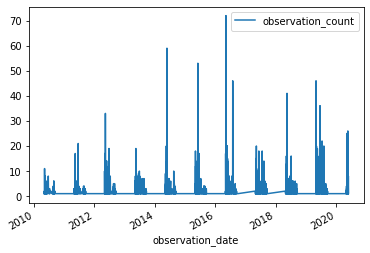

In [10]:
consolidated_data['observation_count'] = pd.to_numeric(consolidated_data['observation_count'])
consolidated_data.plot(x='observation_date', y='observation_count')

The plot above looks a bit messy, as we actually plotted total sightings per day. The high-level relationship could be visualized more cleanly if we summed up total sightings per month, as shown below.

In [11]:
monthly_df = consolidated_data[['observation_date', 'observation_count']]
sightings_by_month = monthly_df.resample('M', on='observation_date').sum()
sightings_by_month = sightings_by_month.reset_index()
sightings_by_month.head()

,observation_date,observation_count
0,2010-05-31,317
1,2010-06-30,42
2,2010-07-31,14
3,2010-08-31,104
4,2010-09-30,59


Note: we use 'reset_index' above because 'observation_date' got converted to the index when consolidated_data was resampled.

In [12]:
import matplotlib.dates as mdates

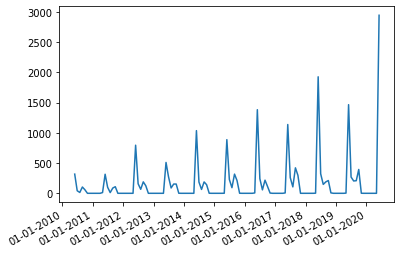

In [13]:
plt.figure()
plt.plot(sightings_by_month['observation_date'], sightings_by_month['observation_count'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

This visualization is much easier to read! Canada Warbler sightings definitely trended higher than past years in 2020. But why? Were there more sampling events, and therefore more birds counted? Were there more people out birdwatching due to COVID?

In the plot above, any more detail on the x-axis ticks would be tough to read. A better visual experience would be seeing all years plotted against eachother on the same graph. We can achieve this using  grouping and resampling methodologies.

In [14]:
import calendar
sightings_by_month['month'] = pd.DatetimeIndex(sightings_by_month['observation_date']).month
sightings_by_month['year'] = pd.DatetimeIndex(sightings_by_month['observation_date']).year
sightings_by_month.head()

,observation_date,observation_count,month,year
0,2010-05-31,317,5,2010
1,2010-06-30,42,6,2010
2,2010-07-31,14,7,2010
3,2010-08-31,104,8,2010
4,2010-09-30,59,9,2010


Above, we created a new dataframe only containing observation date and observation count. 

Added columns for month and year to make it a little easier to group into a list of dataframes, as shown below. Note that this also could have been done with the built-in pandas datetime functionality. Our goal in the code below will be to create a plot with month on the x-axis and the data from each year plotted against eachother. Let's see the data from each year stacks up.

First, a list of dataframes will be created. We'll break up the parent dataframe into smaller dataframes grouped by year. This will allow us to iterate through the list and plot on a line graph using matplotlib. 

In [15]:
DFList = []
for group in sightings_by_month.groupby(sightings_by_month['year']):
    DFList.append(group[1])
    

print(DFList[9]) #[9] yields 2019, [8] yields 2018, and so on...

    observation_date  observation_count  month  year
104       2019-01-31                  0      1  2019
105       2019-02-28                  0      2  2019
106       2019-03-31                  0      3  2019
107       2019-04-30                  3      4  2019
108       2019-05-31               1465      5  2019
109       2019-06-30                269      6  2019
110       2019-07-31                204      7  2019
111       2019-08-31                208      8  2019
112       2019-09-30                394      9  2019
113       2019-10-31                  1     10  2019
114       2019-11-30                  0     11  2019
115       2019-12-31                  0     12  2019


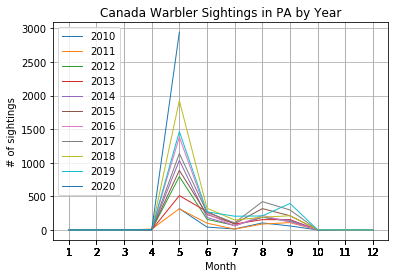

In [16]:
from matplotlib.pyplot import figure

plt.figure()
for i in DFList:
    year = i.iat[0, 3] # fast access for scalar values to access a 'year' value in the DF
    plt.plot(i['month'], i['observation_count'], linewidth=1, label = year)
    plt.grid(True)
    

plt.title("Canada Warbler Sightings in PA by Year", loc='center', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Month")
plt.ylabel("# of sightings")
    

plt.legend(loc="upper left")

plt.xticks(sightings_by_month['month'])
ax = plt.gca()

plt.show()

The multi-line plot of sightings by year was created by iterating through the list of dataframes as I mentioned previously. This confirms what we saw in the plots with the full timeline on the x-axis, but it consolidates and adds visual appeal.

Although it looks like 2020 was a strong year for Canada Warblers, it is still very possible that this is an artifact of an increase in birdwatchers and not birds. To test this hypothesis, we check if more people have been logging on eBird so far in 2020. We will factor in observer_id and global_unique_ID to determine if more observers/checklists correlate w/ the uptick.

First, let's find the total number of unique birders that saw Canada Warblers from 2010-2020:

In [17]:
n_birders_total = consolidated_data['observer_id'].nunique()
print(n_birders_total)

1848


Now, let's create a new dataframe by grouping observer_id by year and finding the number of unique birders each year that saw Canada Warblers. Remember, the dataframe consolidated_data ONLY contains data for Canada Warbler sightings! We will import additional data later on from data files containing total sampling events and total indiviual birders for all species.

In [18]:
consolidated_data['year'] = pd.DatetimeIndex(consolidated_data['observation_date']).year
yearly_unique_birders_cw = consolidated_data.groupby('year')['observer_id'].nunique().reset_index()
yearly_unique_birders_cw = yearly_unique_birders_cw.rename(columns={"observer_id": "unique_observer_count_cw"})
yearly_unique_birders_cw.head()

,year,unique_observer_count_cw
0,2010,117
1,2011,141
2,2012,245
3,2013,277
4,2014,390


For convenience, I used Excel to transform an 8GB data file containing all eBird data for PA from 2010-2020 in order to obtain a table containing all of the unique birdwatcher IDs (observer_id), in other words how many birders logged data each year.

We need this data to assess how many birders logged data each year vs how many birders logged Canada Warbler sightings each year. In doing so, we can determine if the increase in birders correlates with the increase in Canada Warbler sightings.

In [19]:
yearly_unique_birders_all_df = pd.read_csv(r'C:\Users\mikea\Documents\Python Practice\unique_observer_id_per_year.csv')
yearly_unique_birders_all_df.columns = [x.lower() for x in yearly_unique_birders_all_df.columns]
yearly_unique_birders_all_df.columns = yearly_unique_birders_all_df.columns.str.replace(' ', '_')
yearly_unique_birders_all_df.head()

,observation_date,observer_id
0,1/1/2010,obsr110959
1,1/1/2010,obsr117538
2,1/1/2010,obsr215041
3,1/1/2010,obsr439989
4,1/1/2010,obsr23245


Ok, now let's create a column for the year so we can group and count the number of unique birders per year...

In [20]:
yearly_unique_birders_all_df['year'] = pd.DatetimeIndex(yearly_unique_birders_all_df['observation_date']).year
yearly_unique_birders_all_df['month'] = pd.DatetimeIndex(yearly_unique_birders_all_df['observation_date']).month
yearly_unique_birders_all_df.head()

,observation_date,observer_id,year,month
0,1/1/2010,obsr110959,2010.0,1.0
1,1/1/2010,obsr117538,2010.0,1.0
2,1/1/2010,obsr215041,2010.0,1.0
3,1/1/2010,obsr439989,2010.0,1.0
4,1/1/2010,obsr23245,2010.0,1.0


In [21]:
yearly_unique_birders_all = yearly_unique_birders_all_df.groupby('year')['observer_id'].nunique().reset_index()
yearly_unique_birders_all['year'] = yearly_unique_birders_all['year'].astype(int).replace('\.0', '', regex=True)
yearly_unique_birders_all = yearly_unique_birders_all.rename(columns={"observer_id": "unique_observer_count_overall"})
yearly_unique_birders_all.head()

,year,unique_observer_count_overall
0,2010,1427
1,2011,1758
2,2012,2459
3,2013,3231
4,2014,3884


Now that we have two dataframes describing the number of birders who logged data overall (all species) as well as the number of birders who logged data for Canada Warblers, we can combine into a singular dataset and plot against each other...

In [22]:
yearly_unique_birders_all['unique_observer_count_cw'] = yearly_unique_birders_cw['unique_observer_count_cw']
yearly_unique_birders_all.head()

,year,unique_observer_count_overall,unique_observer_count_cw
0,2010,1427,117
1,2011,1758,141
2,2012,2459,245
3,2013,3231,277
4,2014,3884,390


<Figure size 3600x4000 with 0 Axes>

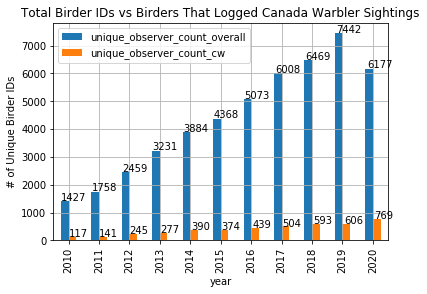

In [23]:
fig = plt.figure(figsize=(18, 20), dpi= 200, facecolor='w', edgecolor='k')
ax2 = ax.twinx()

ax = yearly_unique_birders_all.plot.bar(x="year", y=["unique_observer_count_overall", "unique_observer_count_cw"])
ax.plot(figsize=(20,5))
plt.title("Total Birder IDs vs Birders That Logged Canada Warbler Sightings", loc='center', fontsize=12, fontweight=0, color='Black')
plt.ylabel("# of Unique Birder IDs")
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

While this is helpful, it would be better to see this data in terms of percentages. Additionally, the 2020 year is not complete yet so there is skew occurring. The month with the highest number of Canada Warbler sightings is May. 

Let's extract only data from May of each year from the consolidated_data dataframe (which only contains data for Canada Warbler sightings). Below we create a new dataframe only containing observation_date and observer_id columns. The data is then grouped by month with row counts for the number of unique birders tallied up in the unique_may_birders_cw column.

In [24]:
monthly_birders_cw_df = consolidated_data[['observation_date', 'observer_id']]
monthly_birders_cw_df = monthly_birders_cw_df.rename(columns={"observer_id": 
                                                                        "unique_may_birders_cw"})
monthly_birders_cw_df = monthly_birders_cw_df.resample('M', on='observation_date').count()
monthly_birders_cw_df = monthly_birders_cw_df.drop(columns=['observation_date'])
monthly_birders_cw_df = monthly_birders_cw_df.reset_index()
print(monthly_birders_cw_df)

    observation_date  unique_may_birders_cw
0         2010-05-31                    160
1         2010-06-30                     18
2         2010-07-31                      9
3         2010-08-31                     69
4         2010-09-30                     49
..               ...                    ...
116       2020-01-31                      0
117       2020-02-29                      0
118       2020-03-31                      0
119       2020-04-30                      0
120       2020-05-31                   1899

[121 rows x 2 columns]


In [25]:
monthly_birders_cw_df['month'] = pd.DatetimeIndex(monthly_birders_cw_df['observation_date']).month
monthly_birders_cw_df['year'] = pd.DatetimeIndex(monthly_birders_cw_df['observation_date']).year
monthly_birders_cw_df = monthly_birders_cw_df.query('month =="5"')
monthly_birders_cw_df = monthly_birders_cw_df.reset_index(drop = True) #need to reset index because query results in intervals of 12 in index
monthly_birders_cw_df.head()

,observation_date,unique_may_birders_cw,month,year
0,2010-05-31,160,5,2010
1,2011-05-31,182,5,2011
2,2012-05-31,403,5,2012
3,2013-05-31,302,5,2013
4,2014-05-31,612,5,2014


Now we want to compare this data to the total number of unique birders that logged checklist in May of each year. We want to get the percentage of birders that logged checklist containing Canada Warbler in May each year. The file below contains columns 'observer_id', 'year', and 'month'. Excel transformations performed to filter for the month of May and remove duplicate rows. The code below yields the total number of unique birders that encountered Canada Warbler at some point in May of that year.

The may_unique_birders_all dataframe is created and filled with data from the .csv file exported from the data transformation I just mentioned. The data cleanup is performed as in previous examples and the rows are grouped by year with unique observer_id tallied up in the 'observer_id' column, which is renamed as 'unique_may_birders_all'. 

In [26]:
may_unique_birders_all = pd.read_csv(r'C:\Users\mikea\Documents\Python Practice\unique_birders_may_2010_to_2020.csv')
may_unique_birders_all.columns = [x.lower() for x in may_unique_birders_all.columns]
may_unique_birders_all.columns = may_unique_birders_all.columns.str.replace(' ', '_')
may_unique_birders_all = may_unique_birders_all.groupby('year')['observer_id'].count().reset_index()
may_unique_birders_all['year'] = may_unique_birders_all['year'].astype(int).replace('\.0', '', regex=True)
may_unique_birders_all = may_unique_birders_all.rename(columns={'observer_id': 
                                                                        'unique_may_birders_all'})
may_unique_birders_all.head(11)


,year,unique_may_birders_all
0,2010,4253
1,2011,5433
2,2012,7886
3,2013,9704
4,2014,11593
5,2015,13227
6,2016,15597
7,2017,18270
8,2018,20427
9,2019,23282


Now, we'll add the counts from the dataframe containing total unique birder counts from the Canada Warbler data frame ('unique_may_birders_cw') as a column to the dataframe containing total unique birder counts overall ('may_unique_birders_all'). Then, we calculate a new column as percentage of birders that logged Canada Warblers.

In [27]:
may_unique_birders_all['unique_may_birders_cw'] = monthly_birders_cw_df['unique_may_birders_cw']
may_unique_birders_all['percentage_cw'] = may_unique_birders_all['unique_may_birders_cw']/may_unique_birders_all['unique_may_birders_all']*100
may_unique_birders_all = may_unique_birders_all.round({'percentage_cw': 2})
may_unique_birders_all[9:]

,year,unique_may_birders_all,unique_may_birders_cw,percentage_cw
9,2019,23282,737,3.17
10,2020,13278,1899,14.30


And now, we plot.

<Figure size 3600x4000 with 0 Axes>

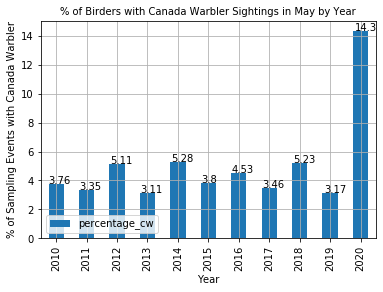

In [28]:
ax = plt.figure(figsize=(18, 20), dpi= 200, facecolor='w', edgecolor='k')

ax = may_unique_birders_all.plot.bar(x='year', y='percentage_cw')
ax.plot(figsize=(20,5))
plt.title('% of Birders with Canada Warbler Sightings in May by Year', loc='center', fontsize=10, fontweight=0, color='Black')
plt.ylabel('% of Sampling Events with Canada Warbler')
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='lower left')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Now we have a visual of how many individual birders logged Canada Warbler out of all birders overall. This visualization speaks to the increase in birders that logged Canada Warblers this year (2020). But this could be a result of people having more time to go birdwatching due to COVID, yielding increased likelihood of running into that species due to more birding trips. This begs the question - what was the percentage of checklists where Canada Warblers were logged? 

Let's dig into the total number of checklists. Because the original data file with all Pennsylvania sightings is so large, I did some work on the backend (transform function in Excel) and got the total number of checklists to be 1492336. 

year  sampling_event_identifier count
2010: 31491
2011: 43218
2012: 79499
2013: 99097
2014: 118810
2015: 135292
2016: 160744
2017: 184693
2018: 218904
2019: 247787
2020: 172800

In [29]:
yearly_sampling_events_overall = [[2010, 31491], [2011, 43218], [2012, 79499],
                                 [2013, 99097], [2014, 118810], [2015, 135292],
                                 [2016, 160744], [2017, 184693], [2018, 218904],
                                 [2019, 247787], [2020, 172800]]
  
yearly_sampling_events_overall = pd.DataFrame(yearly_sampling_events_overall, columns = ['year', 'sampling_events_total']) 


Getting the total number of sampling events capturing canada warbler using the same logic as we did for unique birders:

In [30]:
yearly_sampling_events_cw = consolidated_data.groupby('year')['sampling_event_identifier'].nunique().reset_index()
yearly_sampling_events_cw = yearly_sampling_events_cw.rename(columns={"sampling_event_identifier": "sampling_events_cw"})
yearly_sampling_events_cw.head()

,year,sampling_events_cw
0,2010,305
1,2011,372
2,2012,733
3,2013,669
4,2014,995


Then merge the sample event dataframes into one...

In [31]:
yearly_sampling_events_overall['yearly_sampling_events_cw'] = yearly_sampling_events_cw['sampling_events_cw']
yearly_sampling_events_overall.head()

,year,sampling_events_total,yearly_sampling_events_cw
0,2010,31491,305
1,2011,43218,372
2,2012,79499,733
3,2013,99097,669
4,2014,118810,995


Text(0, 0.5, 'sampling events w. Canada Warbler')

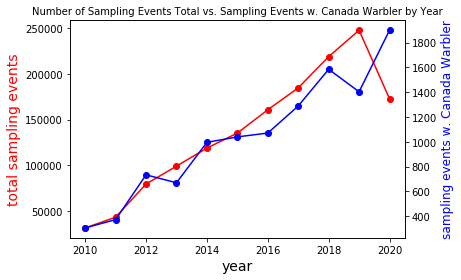

In [32]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title('Number of Sampling Events Total vs. Sampling Events w. Canada Warbler by Year',
         loc='center', fontsize=10, fontweight=0, color='Black')
# make a plot
ax.plot(yearly_sampling_events_overall.year, yearly_sampling_events_overall.sampling_events_total, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("total sampling events",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(yearly_sampling_events_overall.year, yearly_sampling_events_overall["yearly_sampling_events_cw"],color="blue",marker="o")
ax2.set_ylabel("sampling events w. Canada Warbler",color="blue",fontsize=12)

This is interesting for a few reasons. Firstly, the 2020 data only goes up until June (when the data was extracted from eBird for use in this analysis). While the total number of eBird sampling events dips in 2020 to reflect this, the total number of eBird sampling events where Canada Warblers were spotted continues to rise, and 2020 is only halfway over!

What's next?
1. Statistical significance testing of # of individual birders, # of sampling events, and # of canada warbler sightings. Determine whether the number of sightings in 2020 is significantly greater than previous years
    a. NOTE: to do this, it may make sense to only use data from April-June since 2020 dataset is not complete
2. Analysis of whether the uptick in sightings was only in certain geographical locations, if significant
3. Plotting the counties and locations with the highest sightings
4. Utilizing python GIS packages to visualize where and when sightings occurred to try to find migration routes and hotspots
5. Analysis of migration timing - was 2020 early, late, or normal compared to previous years?

Taking a look at the numbers above, we can determine the percentage of sampling events where Canada Warblers were found

In [33]:
yearly_sampling_events_overall['percentage_cw'] = yearly_sampling_events_overall[
    'yearly_sampling_events_cw']/yearly_sampling_events_overall['sampling_events_total']*100

Since the data indicates May is the prominent month in PA for Canada Warbler sightings, I've used Excel data transformations to compile a .csv file containing all sampling events in the month of May from 2010 to 2020. 

We will use this to determine whether the number of sampling events containing canada warblers was significantly greater in the May of 2020 than in previous years.

In [34]:
may_sampling_events = pd.read_csv(r'C:\Users\mikea\Documents\Python Practice\sampling_events_only_may_2010_to_2020.csv')

First step is to format column headers, as we've done with all imported files and use .head() to take a look.

Note all the data is from May sightings as stated above.

In [35]:
from pandas.tseries.offsets import MonthEnd
may_sampling_events.columns = [x.lower() for x in may_sampling_events.columns]
may_sampling_events.columns = may_sampling_events.columns.str.replace(' ', '_')
may_sampling_events.head()

,county,month,year,observer_id,sampling_event_identifier
0,Berks,5,2010,obsr23245,S10154783
1,Montgomery,5,2010,obsr115891,S6383484
2,Bucks,5,2010,obsr41111,S6411122
3,Delaware,5,2010,obsr21752,S6401322
4,Bucks,5,2010,obsr41111,S6381719


Now, we can use the dataframe above to create a smaller dataframe only containing the year and the total number of sightings that occurred in May of that year. 

In [36]:
may_sampling_yearly_counts = may_sampling_events.groupby('year')['sampling_event_identifier'].nunique().reset_index()
may_sampling_yearly_counts = may_sampling_yearly_counts.rename(columns={"sampling_event_identifier": 
                                                                        "unique_may_sampling_events_overall"})
may_sampling_yearly_counts.head()

,year,unique_may_sampling_events_overall
0,2010,4070
1,2011,5211
2,2012,10335
3,2013,12591
4,2014,17223


Next, we'll create another dataframe from the original dataframe (consolidated_data), which only contains data for Canada Warbler sightings. We'll resample the consolidated_data dataframe to yield the total number of sampling events for each month in which Canada Warblers were included in the sampling event.

In [37]:
monthly_sampling_events_cw_df = consolidated_data[['observation_date', 'sampling_event_identifier']]
monthly_sampling_events_cw_df = monthly_sampling_events_cw_df.rename(columns={"sampling_event_identifier": 
                                                                        "unique_may_sampling_events_cw"})
monthly_sampling_events_cw_df = monthly_sampling_events_cw_df.resample('M', on='observation_date').count()
monthly_sampling_events_cw_df = monthly_sampling_events_cw_df.drop(columns=['observation_date'])
monthly_sampling_events_cw_df = monthly_sampling_events_cw_df.reset_index()
monthly_sampling_events_cw_df.head()

,observation_date,unique_may_sampling_events_cw
0,2010-05-31,160
1,2010-06-30,18
2,2010-07-31,9
3,2010-08-31,69
4,2010-09-30,49


The month and year need to be extracted from this dataframe so we can isolate the May sightings and then sort by year.

In [38]:
monthly_sampling_events_cw_df['month'] = pd.DatetimeIndex(monthly_sampling_events_cw_df['observation_date']).month
monthly_sampling_events_cw_df['year'] = pd.DatetimeIndex(monthly_sampling_events_cw_df['observation_date']).year
monthly_sampling_events_cw_df = monthly_sampling_events_cw_df.query('month =="5"')
monthly_sampling_events_cw_df = monthly_sampling_events_cw_df.reset_index(drop = True) #need to reset index because query results in intervals of 12 in index
monthly_sampling_events_cw_df.head()

,observation_date,unique_may_sampling_events_cw,month,year
0,2010-05-31,160,5,2010
1,2011-05-31,182,5,2011
2,2012-05-31,403,5,2012
3,2013-05-31,302,5,2013
4,2014-05-31,612,5,2014


Now that we have the total number of sampling events for Canada Warbler sightings each year, we can add the unique_may_sampling_events_cw column to the may_sampling_yearly_counts dataframe to compare the values!

In [39]:
may_sampling_yearly_counts['unique_may_sampling_events_cw'] = monthly_sampling_events_cw_df['unique_may_sampling_events_cw']
may_sampling_yearly_counts.head()

,year,unique_may_sampling_events_overall,unique_may_sampling_events_cw
0,2010,4070,160
1,2011,5211,182
2,2012,10335,403
3,2013,12591,302
4,2014,17223,612


Text(0, 0.5, 'May sampling events w. Canada Warbler')

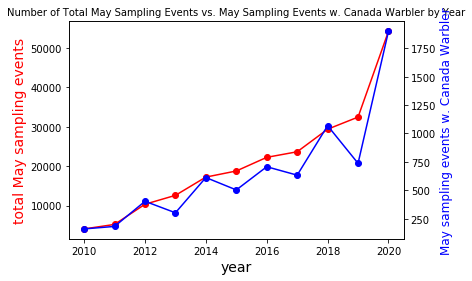

In [40]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title('Number of Total May Sampling Events vs. May Sampling Events w. Canada Warbler by Year',
         loc='center', fontsize=10, fontweight=0, color='Black')
# make a plot
ax.plot(may_sampling_yearly_counts.year, may_sampling_yearly_counts.unique_may_sampling_events_overall, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("total May sampling events",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(may_sampling_yearly_counts.year, may_sampling_yearly_counts["unique_may_sampling_events_cw"],color="blue",marker="o")
ax2.set_ylabel("May sampling events w. Canada Warbler",color="blue",fontsize=12)

The plot above can be better visualized in terms of percentage. So below, we can find the total percentage of sampling events that occurred in May in which Canada Warblers were found. Note that 2020 saw a huge increase in sampling events, and more than twice the amount of sampling events (checklists) containing Canada Warbler sightings! 

In [41]:
may_sampling_yearly_counts['percentage_cw'] = may_sampling_yearly_counts['unique_may_sampling_events_cw']/may_sampling_yearly_counts[
    'unique_may_sampling_events_overall']*100
may_sampling_yearly_counts = may_sampling_yearly_counts.round({'percentage_cw': 2})
may_sampling_yearly_counts.head()

,year,unique_may_sampling_events_overall,unique_may_sampling_events_cw,percentage_cw
0,2010,4070,160,3.93
1,2011,5211,182,3.49
2,2012,10335,403,3.90
3,2013,12591,302,2.40
4,2014,17223,612,3.55


<Figure size 3600x4000 with 0 Axes>

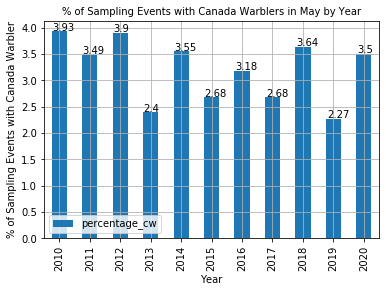

In [43]:
ax = plt.figure(figsize=(18, 20), dpi= 200, facecolor='w', edgecolor='k')

ax = may_sampling_yearly_counts.plot.bar(x='year', y='percentage_cw')
ax.plot(figsize=(20,5))
plt.title('% of Sampling Events with Canada Warblers in May by Year', loc='center', fontsize=10, fontweight=0, color='Black')
plt.ylabel('% of Sampling Events with Canada Warbler')
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='lower left')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Based on the visualization above, it looks like the percentage of sampling events with Canada Warblers was pretty average. This could indicate that the increase in canada warbler sightings was indeed the result of more sampling events rather than an actual increase in birds. It is safe to say that the large increase in sampling events in May 2020 was responsibe for the major increase in percentage of birdwatchers logging Canada Warbler sightings at some point in May.